In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.style.use('seaborn')
    plt.title(title+str(img.shape))
    plt.show()

(100, 100, 3)
(100, 100)


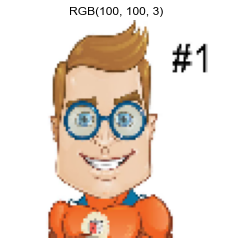

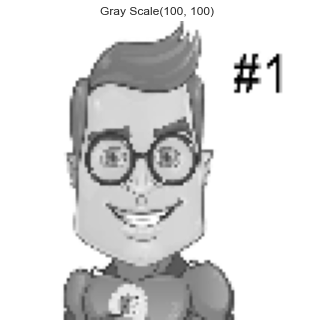

In [3]:
img_ = cv2.imread('cody.jpg')
img_ = cv2.resize(img_, (100, 100))
print(img_.shape)
img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
drawImg(img, "RGB")
drawImg(img_gray, "Gray Scale")

In [4]:
def convolutionOld(img, img_filter):
    W = img.shape[0]
    H = img.shape[1]

    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1, H-F+1))

    for row in range(1, W-1):
        for col in range(1, H-1):
            for i in range(F):
                for j in range(F):
                    new_img[row-1][col-1] += img[row-1+i][col-1+j]*img_filter[i][j]
                if new_img[row-1][col-1] > 255:
                    new_img[row-1][col-1] = 255
                elif new_img[row-1][col-1] < 0:
                    new_img[row-1][col-1] = 0

        return new_img

In [5]:
def convolution(img, img_filter):
    W = img.shape[0]
    H = img.shape[1]

    F = img_filter.shape[0]
    new_image = np.zeros((W-F+1, H-F+1))

    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_image[row][col] += img[row+i][col+j]*img_filter[i][j]
                if new_image[row-1][col-1] > 255:
                    new_image[row-1][col-1] = 255
                elif new_image[row-1][col-1] < 0:
                    new_image[row-1][col-1] = 0

    return new_image        

In [6]:
blur_filter = np.ones((3, 3))/9.0
output1 = convolution(img_gray, blur_filter)

In [7]:
edge_filter = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
output2 = convolution(img_gray, edge_filter)

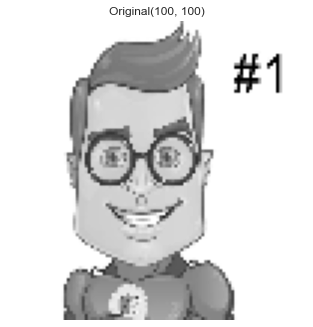

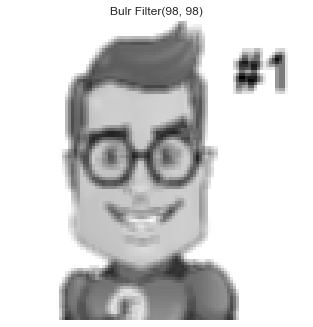

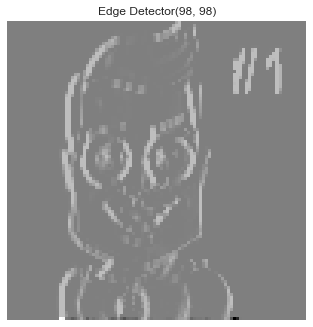

In [8]:
drawImg(img_gray, "Original")
drawImg(output1, "Bulr Filter")
drawImg(output2, "Edge Detector")

In [11]:
%%HTML
<div align= 'middle'>
<video width= '100%' controls>
    <source src='D:\VS\Coding-Blocks-ML\CNN\conv_kiank.mp4' type="video/mp4">
</video><div>

In [12]:
pad_img = np.pad(img, ((10, 10), (10, 10), (0, 0)), 'constant', constant_values=200)

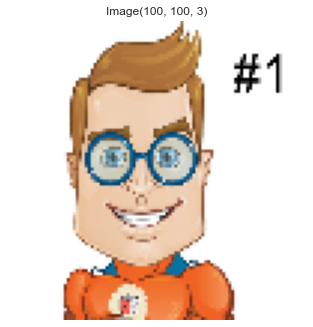

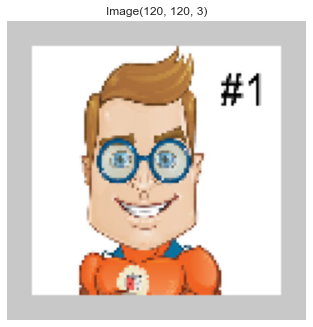

In [13]:
drawImg(img)
drawImg(pad_img)

Implementing Pooling Operation

In [14]:
X = np.array([[1, 0, 2, 3], [4, 6, 6, 8], [3, 1, 1, 0], [1, 2, 2, 4]])
X_pool_output = np.zeros((2, 2))
H, W = X.shape
f = 2
stride = 2

HO = int((H-f)/stride)+ 1
WO = int((W-f)/stride)+ 1

for r in range(HO):
    for c in range(WO):
        r_start = r*stride
        r_end = r_start + f
        c_start = c*stride
        c_end = c_start + f
        X_slice = X[r_start:r_end, c_start:c_end]
        X_pool_output[r][c] = np.max(X_slice)

print("X \n", X)
print("X after Pooling \n", X_pool_output)

X 
 [[1 0 2 3]
 [4 6 6 8]
 [3 1 1 0]
 [1 2 2 4]]
X after Pooling 
 [[6. 8.]
 [3. 4.]]
